{'SystemKey': 'dad5dd860cbcaef3c6e194f5a1dd01', 'SystemSecret': 'DAD5DD860CDEC493B0B89BACCC3B', 'email': 'akshattekriwal123@gmail.com', 'password': 'qwertyuiop'}
CB Info: Authenticating akshattekriwal123@gmail.com as a user...
CB Info: Successfully authenticated!
CB Info: Connecting to MQTT.
Mqtt Debug: Sending CONNECT (u1, p1, wr0, wq0, wf0, c1, k30) client_id=b'275bb670e3844719a13735f3e9eaeef0'
Mqtt Debug: Received CONNACK (0, 0)
CB Info: Connected to MQTT broker at platform.clearblade.com port 1883.
Mqtt Debug: Sending SUBSCRIBE (d0, m1) [(b'analytics', 0)]
Mqtt Debug: Received SUBACK
Mqtt Debug: Received PUBLISH (d0, q0, r0, m0), 'analytics', ...  (17269 bytes)


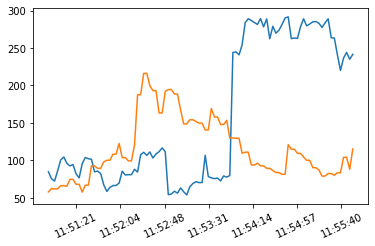

['11:53:54', '11:53:57', '11:54:00', '11:54:48']
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Received PUBLISH (d0, q0, r0, m0), 'analytics', ...  (17305 bytes)


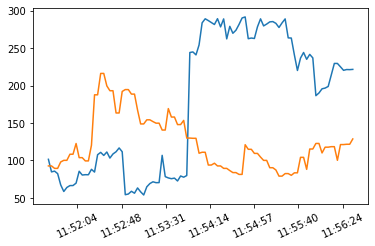

['11:53:54', '11:53:57', '11:54:00', '11:56:33']
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Received PUBLISH (d0, q0, r0, m0), 'analytics', ...  (17365 bytes)


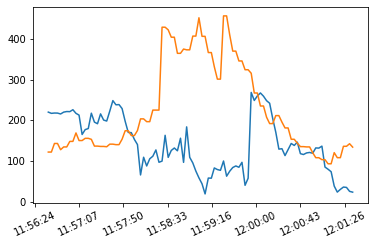

['11:58:31', '11:58:46', '11:58:52', '11:59:55', '11:59:58', '12:00:01', '12:00:04', '12:00:07']
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Received PUBLISH (d0, q0, r0, m0), 'analytics', ...  (17441 bytes)


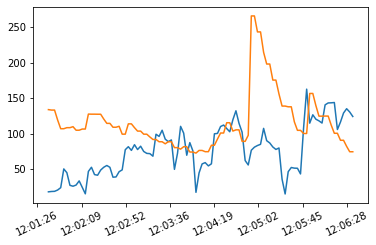

['12:04:55', '12:04:58', '12:05:01', '12:05:04', '12:05:07', '12:05:10', '12:05:13', '12:05:16', '12:05:19', '12:05:22', '12:05:52', '12:05:55', '12:05:58', '12:06:01', '12:06:04', '12:06:07', '12:06:10']
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Received PUBLISH (d0, q0, r0, m0), 'analytics', ...  (17515 bytes)


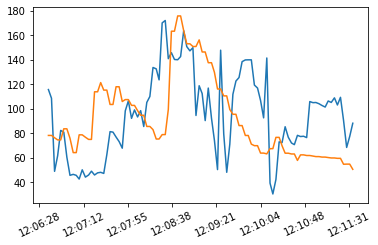

['12:07:52', '12:07:55', '12:08:01', '12:08:07', '12:08:34', '12:08:37', '12:08:40', '12:08:43', '12:08:46', '12:08:49', '12:08:52', '12:08:55', '12:08:58', '12:09:01', '12:09:04', '12:09:07', '12:09:13', '12:09:25', '12:09:37', '12:09:40']
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Received PUBLISH (d0, q0, r0, m0), 'analytics', ...  (17095 bytes)


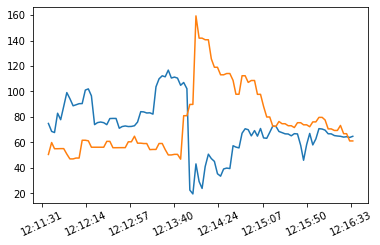

['12:13:50', '12:13:53']
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Received PUBLISH (d0, q0, r0, m0), 'analytics', ...  (17805 bytes)


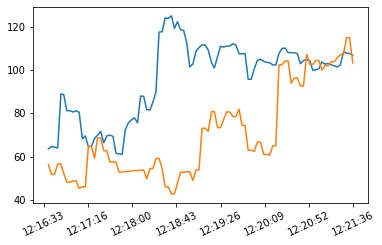

['12:19:08', '12:19:11', '12:19:14', '12:19:17', '12:19:20', '12:19:23', '12:19:26', '12:19:29', '12:19:32', '12:19:35', '12:19:38', '12:19:41', '12:19:44', '12:19:47', '12:19:50', '12:20:23', '12:20:26', '12:20:29', '12:20:32', '12:20:35', '12:20:38', '12:20:41', '12:20:44', '12:20:47', '12:20:50', '12:20:53', '12:20:56', '12:20:59', '12:21:02', '12:21:05', '12:21:08', '12:21:11', '12:21:14', '12:21:17', '12:21:20', '12:21:23', '12:21:26', '12:21:29', '12:21:32', '12:21:35']
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRE

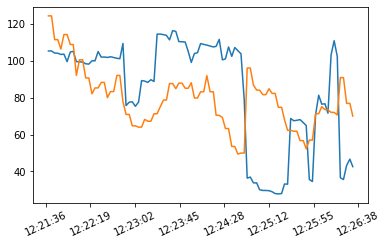

['12:21:38', '12:21:41', '12:21:44', '12:21:47', '12:21:50', '12:21:53', '12:21:56', '12:21:59', '12:22:02', '12:22:05', '12:22:08', '12:22:11', '12:22:14', '12:22:17', '12:22:20', '12:22:23', '12:22:26', '12:22:29', '12:22:32', '12:22:35', '12:22:38', '12:22:41', '12:22:44', '12:22:47', '12:23:35', '12:23:38', '12:23:41', '12:23:44', '12:23:47', '12:23:50', '12:23:53', '12:23:56', '12:23:59', '12:24:02', '12:24:05', '12:24:08', '12:24:11', '12:24:15', '12:24:18']
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP
Mqtt Debug: Sending PINGREQ
Mqtt Debug: Received PINGRESP


In [ ]:
#!/usr/bin/env python
'''
Author: Akshat Tekriwal

This is the python client for collecting context switching data and sending it over to the clearblade platform 
at every 3 seconds using MQTT

Note that I am following UDP approach, and after sending my data I am looking for any response because if if wouldn't 
matter if a few packets arre lost.
'''
from clearblade.ClearBladeCore import System, Query, Developer
import time
import json
import threading
import psutil
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt

with open('config.json', 'r') as f:
    config = json.load(f)

print(config)
#Configure
SystemKey = config["SystemKey"]
SystemSecret = config["SystemSecret"]
mySystem = System(SystemKey, SystemSecret)
email = config["email"]
password = config["password"]
akshat = mySystem.User(email, password)

#Establish MQTT
mqtt = mySystem.Messaging(akshat)
def plot(payload):
    dates=[dt.datetime.fromtimestamp(ts["timestamp"]) for ts in payload["data"]]
    datenums=md.date2num(dates)
    values= [elem["ctx_switches"] for elem in payload["data"]]
    value2= [elem["load"] for elem in payload["data"]]
    plt.subplots_adjust(bottom=0.2)
    plt.xticks( rotation=25 )
    ax=plt.gca()
    xfmt = md.DateFormatter('%H:%M:%S')
    ax.xaxis.set_major_formatter(xfmt)
    plt.plot(datenums,values,label="ctx_switches")
    plt.plot(datenums,value2,label="process_queue")
    plt.show(block=True)
    ax.legend()
    fd=[dt.datetime.fromtimestamp(ts).strftime('%H:%M:%S') for ts in payload["anomaly_time"]]
    print(fd)
def processData(payload):
    plot(payload)
   

def on_connect(client, userdata, flags, rc):
    # When we connect to the broker, subscribe to the southernplayalisticadillacmuzik topic
    client.subscribe("analytics")
    
def on_message(client, userdata, message):
    # When we receive a message, print it out
    processData(json.loads(message.payload))
    #print "Received message '" + message.payload + "' on topic '" + message.topic + "'"


    

# Connect callbacks to client
mqtt.on_connect = on_connect
mqtt.on_message = on_message

# Connect and wait for messages
mqtt.connect()
while(True):
    time.sleep(1)  # wait for messages


